# DLTHON

## DKTC (Dataset of Korean Threatening Conversations)

- 텍스트 다중분류 프로젝트

## 데이터셋 정보

train.csv

    1. idx = 인덱스
    2. class = 0~4
        class 0; 협박 대화
        class 1; 갈취 대화
        class 2; 직장 내 괴롭힘 대화
        class 3; 기타 괴롭힘 대화
    3. conversation = \n으로 구분된 멀티턴 텍스트 대화

test.json

    1. t_### = 인덱스
    2. text = 대화

submission.csv

    1. file_name = 인덱스
    2. class = 예측값

## 평가기준
> - 데이터 EDA와 데이터 전처리가 적절하게 이뤄졌는가?
> - Task에 알맞게 적절한 모델을 찾아보고 선정했는가?
> - 성능향상을 위해 논리적으로 접근했는가?
> - 결과 도출을 위해 여러가지 시도를 진행했는가?
> - 도출된 결론에 충분한 설득력이 있는가?
> - 적절한 metric을 설정하고 그 사용 근거 및 결과를 분석하였는가?
> - 발표가 매끄럽게 진행되었고 발표시간을 준수하였는지? (발표 10분-15분)

## TO-DO-LIST
- 일반 대화 데이터셋 만들어야함 (800-1000개정도)
- ppt 제작
- 평가지표 : f1-score

## EDA


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import pandas as pd

train_data_path ="./data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [ ]:
train_data.shape

(3950, 3)

In [ ]:
add_data = pd.read_csv('normal_df.csv')
add_data.head()

,conversation,class
0,요즘 동물들을 유기 하는 애들도 참 문제야 ㅠㅠ\n 동물들을 유기 하는 사람이 ...,일반 대화
1,강릉에 어떤 호텔에서 오징어 게임 한데\n 오징어게임? 설마 죽는 거 아이제 ...,일반 대화
2,이렇게 너와 내가 국제 관계를 트는구나\n 그래 해외에 친구가 있는 것도 나쁘지...,일반 대화
3,너는 전철 자주 타고 다니는 편이야?\n 예전엔 많이 타고 다녔는데 요즘 통 안...,일반 대화
4,귀멸의 칼날 봤니?\n 응 당연 봤지\n 안 볼 수가 없지\n 명작\n 키키...,일반 대화


In [ ]:
add_data.shape

(18000, 2)

In [ ]:
train_data.drop('idx', axis=1, inplace=True)

In [ ]:
train_data.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [ ]:
add_1000 = add_data.sample(1000)

In [ ]:
train_data = pd.concat([train_data, add_1000])

In [ ]:
train_data['class'].value_counts()

기타 괴롭힘 대화      1094
일반 대화          1000
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64

## 데이터 전처리

In [ ]:
!pip install soynlp

In [ ]:
import re
# import emoji
from soynlp.normalizer import repeat_normalize

In [ ]:
def clean(x):
    # emojis = ''.join(emoji.UNICODE_EMOJI.keys())
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [ ]:
train_data['cleaned'] = train_data.conversation.apply(lambda x: clean(x))

In [ ]:
train_data['cleaned'].tail()

1622     오늘 중국 완전 이슈더라 키키 중국? 왜? 또 뭐 터진건 아니겠지?.. 중국이 지금...
4020     점 빼러 가야 하는데 언제 가지 키키 아 저번에 점 빼러 간다더니만 키키 맞아 키키...
825      아파트 살아 본 적 있어? 어릴 때 한번 살아봤었어! 오 아파트 살 때 좋았어? 응...
14121    아니 사립 학교 선생님은 공무원 아니라대? 아 진짜? 공무원이지 않나 나는 잘 모름...
7512     동물들은 뭐든 키워 주면 다 날 따르고 좋아하는 거 같음... 맞아 동물은 편견 없...
Name: cleaned, dtype: object

### 한국어 문장 분리기

In [ ]:
# !pip install kss

In [ ]:
samples = train_data.sample(5)

In [ ]:
samples

,class,conversation,cleaned
3146,기타 괴롭힘 대화,어머 얘 오랜만이다\n안녕하세요 잘 지내셨어요?\n얘 근데 넌 살이 좀 찐것 같다?...,어머 얘 오랜만이다 안녕하세요 잘 지내셨어요? 얘 근데 넌 살이 좀 찐것 같다? 아...
2221,일반 대화,너는 음료수 평소에 자주 마셔?\n 나는 물을 잘 안 마셔\n 매일 마시는 편...,너는 음료수 평소에 자주 마셔? 나는 물을 잘 안 마셔 매일 마시는 편이야 ㅠㅠ 아...
1319,기타 괴롭힘 대화,네 고객님 무슨 일이신가요?\n제가 거기서 장을 봤거든요\n네 고객님\n근데 고기가...,네 고객님 무슨 일이신가요? 제가 거기서 장을 봤거든요 네 고객님 근데 고기가 상한...
2178,기타 괴롭힘 대화,저기 거기 제 자리인데요.\n 아니 그냥 갑시다. 자리도 널널한데\n 아니 제 반려...,저기 거기 제 자리인데요. 아니 그냥 갑시다. 자리도 널널한데 아니 제 반려견까지 ...
2253,협박 대화,말같지도 않은 소리하네. 잘 알지도 못하면서 팁이라고 영상 올린거냐?\n 제 주관이...,말같지도 않은 소리하네. 잘 알지도 못하면서 팁이라고 영상 올린거냐? 제 주관이고 ...


In [ ]:
samples.cleaned.iloc[0]

'어머 얘 오랜만이다 안녕하세요 잘 지내셨어요? 얘 근데 넌 살이 좀 찐것 같다? 아.네 그렇네요. 여자애가 이렇게 살이 뒤룩뒤룩 찌면 남자들이 안좋아해. 얼른 살 좀 빼야겠다. 네 그럴게요. 그리고 너 쌍수할 생각은 없니? 네.? 하하.글쎄요. 내가 보니까 넌 쌍수를 해야되는 눈이야. 지금 봐 축 쳐져서 졸려보이니까 전체적인 인상이 어두워보이잖니. 안 그래? 네.고민해볼게요.'

In [ ]:
# from kss import split_sentences

# split_sentences(samples.cleaned.iloc[0])

In [ ]:
# split_sentences(samples.cleaned.iloc[2])

In [ ]:
# split_sentences(samples.cleaned.iloc[-1])

## BERT

In [ ]:
# !pip install -U transformers

In [ ]:
#from transformers import TFElectraModel, ElectraTokenizer

# model = TFElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator", from_pt=True)
#tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
encoder.fit(train_data['class'])

train_data["label"] = encoder.transform(train_data['class'])

In [ ]:
dataset = train_data[['cleaned', 'label']]

In [ ]:
dataset.sample(n=10)

,cleaned,label
1611,3기 신도시 개발 예정 구역이 어디지? . 어머니 집 주소가 노원구 광운로 맞나? ...,4
2334,좋은 말로 할 때 나랑 사귀는걸로 해 싫어 이런 협박이 통할 것 같아? 못하겠으면 ...,4
2488,수현씨! 네? 사무실 냉장고가 너무 지저분하다 네에? 무슨 네에야? 좀 닦으라고 제...,3
2944,성오야 미안한데 나 3만원만 빌려주면 안 돼? 미안해.나도 이번달에 지출이 많았어서...,0
1592,왜 남의것을 함부로 만져? 뭐? 싸가지봐라 내맘인데? 이리줘 싫어 이거 웃기다 애들...,4
3740,오 너가 새로 들어온 신입이야? 네. 대리님. 김길동이라고 합니다 잘 부탁드립니다 ...,3
278,그렇게 죽고싶으면 엄마가 너 죽여줄까? 갑자기 뭔 소리에요? 내가 마음만 먹으면 너...,4
1038,혼자 여행 해 본 적 있어? 아니 ㅠㅠ 이번에 일 그만두고 제주도 혼자 가서 생활해...,2
892,야 거기 찐따. 일로와봐. 저요.? 여기에 찐따가 너 말고 누가 있어. 왜요.? 돈...,0
1459,야 너 김지수한테 고백했다며? 조용히 그냥 지나가. 우리가 너랑 같은 급이라고 생각...,1


In [ ]:
max_seq_len = 0
len_64_128 = 0
len_128_256 = 0

mylist = [0 for i in range(10000)]
for index, value in dataset['cleaned'].items():
    mylist[len(value)] += 1
    max_seq_len = max(max_seq_len, len(value))

    if len(value) >= 64 and len(value) < 128:
        len_64_128 += 1
    elif len(value) >= 128 and len(value) < 256:
        len_128_256 += 1

print(f'가장 긴 문장 길이: {max_seq_len}')
print(f'64과 128 사이 길이 문장 개수: {len_64_128}')
print(f'128과 256 사이 길이 문장 개수: {len_128_256}')

가장 긴 문장 길이: 1724
64과 128 사이 길이 문장 개수: 462
128과 256 사이 길이 문장 개수: 2344


In [ ]:
max_seq_len = 800

In [ ]:
dataset

,cleaned,label
0,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...,4
1,길동경찰서입니다. 9시 40분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만...,4
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...,1
3,어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...,0
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,0
...,...,...
1622,오늘 중국 완전 이슈더라 키키 중국? 왜? 또 뭐 터진건 아니겠지?.. 중국이 지금...,2
4020,점 빼러 가야 하는데 언제 가지 키키 아 저번에 점 빼러 간다더니만 키키 맞아 키키...,2
825,아파트 살아 본 적 있어? 어릴 때 한번 살아봤었어! 오 아파트 살 때 좋았어? 응...,2
14121,아니 사립 학교 선생님은 공무원 아니라대? 아 진짜? 공무원이지 않나 나는 잘 모름...,2


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ElectraTokenizer, ElectraModel, ElectraConfig, AdamW
import torch.nn as nn
import wandb
from sklearn.metrics import f1_score

# wandb.login(key ='41f703d2a27233965949ceec062860a34d822ed9')
# W&B 초기화
wandb.init(project="koelectra-multi-label-classification3", entity="seongyeonkim")

# 데이터 로드
df = train_data[['cleaned', 'label']]

# KoElectra tokenizer 로드
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

# 토큰화 및 레이블 변환 함수 정의
label_map = {
    0: [1, 0, 0, 0, 0],
    1: [0, 1, 0, 0, 0],
    2: [0, 0, 1, 0, 0],
    3: [0, 0, 0, 1, 0],
    4: [0, 0, 0, 0, 1],
    5: [0, 0, 0, 0, 0]
}

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▇▇▇▆▆▅▆▆▆▅▅▅▄▄▃▅▄▄▄▃▂▃▃▃▂▄▂▃▂▂▂▁▂▂▃▁▁▁
epoch,1
loss,0.49939


In [ ]:
class ViolenceDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx, 0]
        labels = self.dataframe.iloc[idx, 1]
        labels = label_map[labels]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(labels, dtype=torch.float)
        }

# 데이터셋 준비
max_length = 128
dataset = ViolenceDataset(df, tokenizer, max_length)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 모델 정의
class ElectraForMultiLabelClassification(nn.Module):
    def __init__(self, model_name, num_labels):
        super(ElectraForMultiLabelClassification, self).__init__()
        self.electra = ElectraModel.from_pretrained(model_name)
        self.classifier = nn.Linear(self.electra.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        pooled_output = sequence_output[:, 0, :]  # cls token
        logits = self.classifier(pooled_output)
        return logits

model = ElectraForMultiLabelClassification("monologg/koelectra-base-v3-discriminator", num_labels=5)
criterion = nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(), lr=1e-5)

# W&B에 모델을 로깅할 수 있도록 W&B에 등록
wandb.watch(model, log="all")

# 학습 루프
model.train()
for epoch in range(3):
    all_preds = []
    all_labels = []
    for batch in dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        preds = torch.sigmoid(outputs).detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()

        all_preds.append(preds)
        all_labels.append(labels)

        wandb.log({"epoch": epoch + 1, "loss": loss.item()})
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # 에포크당 F1 스코어 계산
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    f1 = f1_score(all_labels, (all_preds > 0.5).astype(int), average='micro')

    wandb.log({"epoch": epoch + 1, "f1_score": f1})
    print(f"Epoch {epoch+1}, F1 Score: {f1}")

/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 0.714870035648346
Epoch 1, Loss: 0.7171229720115662
Epoch 1, Loss: 0.6756125688552856
Epoch 1, Loss: 0.6646691560745239
Epoch 1, Loss: 0.6437643766403198
Epoch 1, Loss: 0.6689009666442871
Epoch 1, Loss: 0.6448918581008911
Epoch 1, Loss: 0.6628760099411011
Epoch 1, Loss: 0.6631768941879272
Epoch 1, Loss: 0.6255441904067993
Epoch 1, Loss: 0.6269009113311768
Epoch 1, Loss: 0.6286357045173645
Epoch 1, Loss: 0.6235964894294739
Epoch 1, Loss: 0.6101177930831909
Epoch 1, Loss: 0.6060502529144287
Epoch 1, Loss: 0.5881264805793762
Epoch 1, Loss: 0.5965731739997864
Epoch 1, Loss: 0.5920718908309937
Epoch 1, Loss: 0.572479784488678
Epoch 1, Loss: 0.5703221559524536
Epoch 1, Loss: 0.5638328194618225
Epoch 1, Loss: 0.56646728515625
Epoch 1, Loss: 0.5595858693122864
Epoch 1, Loss: 0.5572429299354553
Epoch 1, Loss: 0.5398986339569092
Epoch 1, Loss: 0.5380059480667114
Epoch 1, Loss: 0.5353927612304688
Epoch 1, Loss: 0.5322884321212769
Epoch 1, Loss: 0.5285736918449402
Epoch 1, Loss: 0.5

In [ ]:
# 모델 저장
model_save_path = './koelectra_multilabel'
torch.save(model.state_dict(), model_save_path + '/pytorch_model2.bin')
tokenizer.save_pretrained(model_save_path)

# W&B에 모델 아티팩트로 업로드
artifact = wandb.Artifact('koelectra-multi-label-classification3', type='model')
artifact.add_dir(model_save_path)
wandb.log_artifact(artifact)

# W&B 실행 종료
wandb.finish()

wandb: Adding directory to artifact (./koelectra_multilabel)... Done. 2.3s


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅█████████████
f1_score,▁▇█
loss,█▇▆▆▅▅▄▄▄▄▃▃▃▂▂▂▃▂▂▂▂▃▂▂▂▁▂▁▂▂▁▁▂▂▁▂▁▁▃▂
epoch,3
f1_score,0.93143
loss,0.06673


## Fine-tuning Model

## Predict

일반대화 예시

```json
{
	"id": {
		"text": "이거 들어봐 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래"
	}
}
```

In [ ]:
import json
with open('./data/test.json') as f:
    test_data = json.load(f)

test_data = pd.DataFrame(test_data).T
test_data.reset_index(drop=True, inplace=True)

In [ ]:
test_data['cleaned'] = test_data.text.apply(lambda x: clean(x))

In [ ]:
test_data

,text,cleaned
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? 그...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...,...
495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이요....
497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이니?...
498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [ ]:
# 예측 함수
def predict(text):
    try:
        model.eval()
        with torch.no_grad():
            encoding = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=128,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
            input_ids = encoding['input_ids']
            attention_mask = encoding['attention_mask']
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
        return probs
    except:
        print(text)
        return torch.zeros([1, 5])

In [ ]:
print(encoder.classes_)

['갈취 대화' '기타 괴롭힘 대화' '일반 대화' '직장 내 괴롭힘 대화' '협박 대화']


In [ ]:
text = test_data.text.iloc[2]
print(text)
predict(text)

너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요


tensor([[0.0387, 0.0849, 0.0208, 0.9298, 0.0288]])

In [ ]:
from tqdm import tqdm, trange

tqdm.pandas()

In [ ]:
test_data['pred'] = test_data['cleaned'].progress_apply(lambda x: predict(x))

100%|██████████| 500/500 [00:29<00:00, 16.78it/s]


In [ ]:
pred_dict = test_data.pred.to_dict()

In [ ]:
pred_dict

{0: tensor([[0.9533, 0.0367, 0.0351, 0.0424, 0.0423]]),
 1: tensor([[0.0429, 0.0502, 0.0261, 0.9475, 0.0325]]),
 2: tensor([[0.0387, 0.0849, 0.0208, 0.9298, 0.0288]]),
 3: tensor([[0.0236, 0.4143, 0.3823, 0.0206, 0.0162]]),
 4: tensor([[0.5759, 0.4269, 0.0061, 0.0451, 0.0300]]),
 5: tensor([[0.0841, 0.0436, 0.0240, 0.0238, 0.9054]]),
 6: tensor([[0.0669, 0.0407, 0.0255, 0.0355, 0.9345]]),
 7: tensor([[0.9156, 0.1059, 0.0194, 0.0247, 0.0299]]),
 8: tensor([[0.0218, 0.4517, 0.1531, 0.1004, 0.0132]]),
 9: tensor([[0.9543, 0.0399, 0.0359, 0.0435, 0.0376]]),
 10: tensor([[0.0622, 0.0448, 0.0257, 0.0297, 0.9283]]),
 11: tensor([[0.0256, 0.1651, 0.8007, 0.0305, 0.0143]]),
 12: tensor([[0.0416, 0.0656, 0.0232, 0.9407, 0.0292]]),
 13: tensor([[0.0335, 0.0472, 0.0342, 0.9403, 0.0308]]),
 14: tensor([[0.0408, 0.0541, 0.0282, 0.9479, 0.0300]]),
 15: tensor([[0.2072, 0.0508, 0.0108, 0.0191, 0.7514]]),
 16: tensor([[0.0207, 0.0944, 0.7273, 0.0277, 0.0422]]),
 17: tensor([[0.0354, 0.8789, 0.0222, 0.1

In [ ]:
# 데이터프레임으로 변환
pred_df = pd.DataFrame({k: v.numpy().flatten() for k, v in pred_dict.items()}).T

In [ ]:
# 열 이름 지정
pred_df.columns = encoder.classes_

In [ ]:
pred_df

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화
0,0.953340,0.036742,0.035063,0.042418,0.042334
1,0.042925,0.050201,0.026098,0.947465,0.032477
2,0.038650,0.084872,0.020752,0.929780,0.028754
3,0.023614,0.414319,0.382253,0.020631,0.016216
4,0.575863,0.426872,0.006124,0.045063,0.029957
...,...,...,...,...,...
495,0.041998,0.053967,0.026981,0.945161,0.030099
496,0.729125,0.070266,0.006941,0.149287,0.036801
497,0.953846,0.043999,0.037242,0.043362,0.037325
498,0.038145,0.036955,0.009056,0.663343,0.330970


In [ ]:
pred_df = pred_df.astype('float')

In [ ]:
pred_df['max_val'] = pred_df.max(axis=1)

In [ ]:
import numpy as np

In [ ]:
pred_df

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화,max_val
0,0.953340,0.036742,0.035063,0.042418,0.042334,0.953340
1,0.042925,0.050201,0.026098,0.947465,0.032477,0.947465
2,0.038650,0.084872,0.020752,0.929780,0.028754,0.929780
3,0.023614,0.414319,0.382253,0.020631,0.016216,0.414319
4,0.575863,0.426872,0.006124,0.045063,0.029957,0.575863
...,...,...,...,...,...,...
495,0.041998,0.053967,0.026981,0.945161,0.030099,0.945161
496,0.729125,0.070266,0.006941,0.149287,0.036801,0.729125
497,0.953846,0.043999,0.037242,0.043362,0.037325,0.953846
498,0.038145,0.036955,0.009056,0.663343,0.330970,0.663343


In [ ]:
pred_df['label'] = pred_df.iloc[:,:5].progress_apply(lambda x : pred_df.columns[np.argmax(x)], axis=1 )

100%|██████████| 500/500 [00:00<00:00, 34217.99it/s]


In [ ]:
pred_df

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화,max_val,label
0,0.953340,0.036742,0.035063,0.042418,0.042334,0.953340,갈취 대화
1,0.042925,0.050201,0.026098,0.947465,0.032477,0.947465,직장 내 괴롭힘 대화
2,0.038650,0.084872,0.020752,0.929780,0.028754,0.929780,직장 내 괴롭힘 대화
3,0.023614,0.414319,0.382253,0.020631,0.016216,0.414319,기타 괴롭힘 대화
4,0.575863,0.426872,0.006124,0.045063,0.029957,0.575863,갈취 대화
...,...,...,...,...,...,...,...
495,0.041998,0.053967,0.026981,0.945161,0.030099,0.945161,직장 내 괴롭힘 대화
496,0.729125,0.070266,0.006941,0.149287,0.036801,0.729125,갈취 대화
497,0.953846,0.043999,0.037242,0.043362,0.037325,0.953846,갈취 대화
498,0.038145,0.036955,0.009056,0.663343,0.330970,0.663343,직장 내 괴롭힘 대화


<AxesSubplot: >

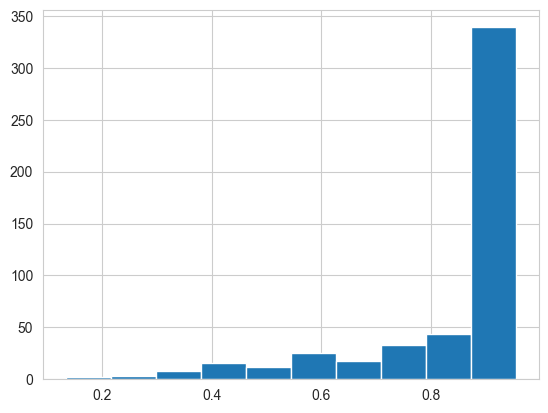

In [ ]:
pred_df.max_val.hist()

In [ ]:
pred_df[pred_df.max_val < 0.4]

,갈취 대화,기타 괴롭힘 대화,일반 대화,직장 내 괴롭힘 대화,협박 대화,max_val,label
82,0.257453,0.191957,0.010350,0.038821,0.082755,0.257453,갈취 대화
110,0.397686,0.320898,0.006995,0.021078,0.053034,0.397686,갈취 대화
116,0.197940,0.116233,0.102986,0.059879,0.009312,0.197940,갈취 대화
121,0.398279,0.198178,0.005622,0.252218,0.016691,0.398279,갈취 대화
127,0.238140,0.085589,0.005690,0.044518,0.340846,0.340846,협박 대화
197,0.117989,0.060089,0.171335,0.332885,0.010327,0.332885,직장 내 괴롭힘 대화
203,0.312438,0.148866,0.004533,0.319914,0.016373,0.319914,직장 내 괴롭힘 대화
207,0.300289,0.044183,0.003703,0.185007,0.223191,0.300289,갈취 대화
223,0.042212,0.138749,0.024425,0.039909,0.397662,0.397662,협박 대화
300,0.165528,0.065158,0.009574,0.218663,0.145596,0.218663,직장 내 괴롭힘 대화


In [ ]:
pred_df['new_label'] = pred_df.label.copy()

In [ ]:
pred_df.loc[pred_df.max_val < 0.4,'new_label'] = '일반 대화'

### 확신하지 못하는 데이터 -> 일반 데이터가 아닐까?

In [ ]:
test_data.iloc[110].cleaned

'내려놓고있기뭐해서 올린거야 응 어머니 캐리어 필요하시다며 문앞에둘테니까 가져가 배낭메고갈거래 짐다쌌어 알겠어 엄마 금토일 가는거였어 너일에 오전에가 새벽에가 그래 롤안해 응안해 아까 내 어떤 말에 기분이 나빴던거야 그거 모르는것도 기분이나빠 말해주면되잖아 내가 하는말 다 기분나빠겠지 아까말했어 근데 너가 그런식으로나온거지 진짜오늘일은 무조건 너잘못이야 나도 내가 일부러 안받는게아닌데 계속 그걸로 우리가 안좋게 이야기가 나오니까 기분이 안 좋아졌어 물론내가 너한테 말 안하고 빌려준게 잘못인건 알아 그래도 계속 그 얘기가 나오는게 싫어 너가 말안해도 생각나면 짜증나는데'

In [ ]:
pred_df.label.value_counts()

갈취 대화          139
기타 괴롭힘 대화      139
직장 내 괴롭힘 대화    112
협박 대화           98
일반 대화           12
Name: label, dtype: int64

In [ ]:
pred_df.new_label.value_counts()

기타 괴롭힘 대화      135
갈취 대화          133
직장 내 괴롭힘 대화    107
협박 대화           94
일반 대화           31
Name: new_label, dtype: int64

In [ ]:
pred_df.to_csv('pred_koelectra_add_data2.csv', index=False)